In [39]:
#Using Goole Colab : Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# import the modules
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score , f1_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

### Load the dataset


In [41]:
# Code starts here
train = pd.read_csv("/content/drive/MyDrive/Car insurance claim/train.csv")

#Dropping df_train Id column : train_id
train_id = train['Unnamed: 0']
train.drop(['Unnamed: 0'], axis=1, inplace=True)

# drop serial number
train.drop(columns=['ID'],inplace=True)
print(train.head())


   KIDSDRIV   AGE  HOMEKIDS   YOJ  ... MVR_PTS CLM_AMT CAR_AGE CLAIM_FLAG
0         1  42.0         3   9.0  ...       4      $0     9.0          1
1         0  50.0         0   7.0  ...       3      $0    18.0          0
2         0  40.0         2  17.0  ...       1    $629     9.0          1
3         2  38.0         2  13.0  ...       5      $0     2.0          0
4         0  38.0         0   NaN  ...       3  $2,156     2.0          1

[5 rows x 24 columns]


### Clean and visualize the data


0    5414
1    2827
Name: CLAIM_FLAG, dtype: int64


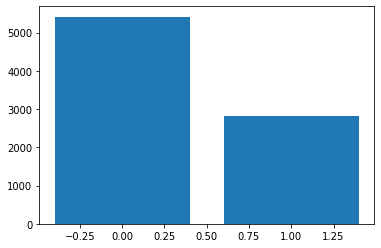

            total_missing  perc_missing
KIDSDRIV                0      0.000000
AGE                     6      0.083206
HOMEKIDS                0      0.000000
YOJ                   442      6.129524
INCOME                462      6.406878
PARENT1                 0      0.000000
HOME_VAL              458      6.351408
MSTATUS                 0      0.000000
GENDER                  0      0.000000
EDUCATION               0      0.000000
OCCUPATION            530      7.349882
TRAVTIME                0      0.000000
CAR_USE                 0      0.000000
BLUEBOOK                0      0.000000
TIF                     0      0.000000
CAR_TYPE                0      0.000000
RED_CAR                 0      0.000000
OLDCLAIM                0      0.000000
CLM_FREQ                0      0.000000
REVOKED                 0      0.000000
MVR_PTS                 0      0.000000
CLM_AMT                 0      0.000000
CAR_AGE               515      7.141867
CLAIM_FLAG              0      0.000000


In [42]:
# Check the distribution of the target variable

#Storing value counts of target variable in 'claim_flag'
claim_flag = train['CLAIM_FLAG'].value_counts()
print(claim_flag)

#Plotting bar plot
plt.bar(claim_flag.index, claim_flag)
plt.show()

# replace the '$' and ',' symbol
columns = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']

for col in columns:
    train[col].replace({'\$': '', ',': ''}, regex=True,inplace=True)
    
# Convert object type to float on train
train[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']]=train[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']].astype(float)

# check missing values in train
print(pd.DataFrame({'total_missing': train.isnull().sum(), 'perc_missing': (train.isnull().sum()/7211)*100}))


In [43]:
# drop missing values
train.dropna(subset=['YOJ','OCCUPATION'],inplace=True)

# Split the data into train and test
X = train.drop(columns = ['CLAIM_FLAG'])
y = train[['CLAIM_FLAG']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
print(y_train['CLAIM_FLAG'].value_counts())
print(y_test['CLAIM_FLAG'].value_counts())
X_train_copy = X_train.copy()

#y_train=y_train[X_train.index]
#y_test=y_test[X_test.index]

# fill missing values with mean
X_train['AGE'].fillna((X_train['AGE'].mean()), inplace=True)
X_train['CAR_AGE'].fillna((X_train['CAR_AGE'].mean()), inplace=True)
X_train['INCOME'].fillna((X_train['INCOME'].mean()), inplace=True)
X_train['HOME_VAL'].fillna((X_train['HOME_VAL'].mean()), inplace=True)

X_test['AGE'].fillna((X_train['AGE'].mean()), inplace=True)
X_test['CAR_AGE'].fillna((X_train['CAR_AGE'].mean()), inplace=True)
X_test['INCOME'].fillna((X_train['INCOME'].mean()), inplace=True)
X_test['HOME_VAL'].fillna((X_train['HOME_VAL'].mean()), inplace=True)

# print(train.isnull().sum())



0    3339
1    1766
Name: CLAIM_FLAG, dtype: int64
0    1444
1     744
Name: CLAIM_FLAG, dtype: int64


### Model building

In [44]:

# Convert the categorical values to numeric value
columns = ["PARENT1","MSTATUS","GENDER","EDUCATION","OCCUPATION","CAR_USE","CAR_TYPE","RED_CAR","REVOKED"]

for col in columns:
    # Instantiate label encoder
    le = LabelEncoder()
    # fit and transform label encoder on train
    X_train[col]=le.fit_transform(X_train[col].astype(str))
    # transform label encoder on X_test
    X_test[col]=le.transform(X_test[col].astype(str))



# X_train.drop(columns = ['CLM_FREQ'], inplace = True)
# X_test.drop(columns = ['CLM_FREQ'], inplace = True)

print(X_train.corr())
    
 # Instantiate logistic regression
model = LogisticRegression(random_state = 6)

# fit the model
model.fit(X_train,y_train)

# predict the result
y_pred =model.predict(X_test)

# calculate the f1 score
score = accuracy_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))



            KIDSDRIV       AGE  HOMEKIDS  ...   MVR_PTS   CLM_AMT   CAR_AGE
KIDSDRIV    1.000000 -0.080150  0.480723  ...  0.056179  0.067480 -0.044222
AGE        -0.080150  1.000000 -0.409191  ... -0.083649 -0.070204  0.162435
HOMEKIDS    0.480723 -0.409191  1.000000  ...  0.075651  0.076259 -0.149092
YOJ         0.043560  0.116404  0.090293  ... -0.043890 -0.023948  0.044306
INCOME     -0.031361  0.158185 -0.144025  ... -0.079417 -0.070036  0.370826
PARENT1     0.203328 -0.298218  0.440183  ...  0.068774  0.109227 -0.056576
HOME_VAL   -0.015861  0.200231 -0.100430  ... -0.110279 -0.112735  0.211295
MSTATUS    -0.044878 -0.097886 -0.051957  ...  0.043107  0.087419  0.031305
GENDER      0.017650 -0.055434  0.095676  ...  0.011871 -0.003070  0.023951
EDUCATION   0.014051  0.030672 -0.039424  ... -0.000639  0.024097 -0.054842
OCCUPATION  0.016397 -0.009866  0.003526  ...  0.041849  0.067004 -0.059115
TRAVTIME    0.006183  0.021620  0.002604  ...  0.012706  0.024132 -0.011784
CAR_USE    -

In [45]:
# Deal with Imbalanced Data

# Instantiate SMOTE 
smote = SMOTE(random_state=9)

# fit smote on training set
X_train, y_train = smote.fit_sample(X_train, y_train)

#print(y_train['CLAIM_FLAG'].value_counts())
#print(y_test['CLAIM_FLAG'].value_counts())

# Instantiate a standardScaler
scaler = StandardScaler()

# Fit on training set only.
X_train = scaler.fit_transform(X_train)

# Apply transform to the test set.
X_test = scaler.transform(X_test)


# Instantiate logistic regression
model = LogisticRegression()

# fit the model
model.fit(X_train,y_train)

# predict the result
y_pred =model.predict(X_test)

# calculate the f1 score
score = accuracy_score(y_test, y_pred)
print(score)

print(confusion_matrix(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8153564899451554
[[1331  113]
 [ 291  453]]
0.6088709677419355
0.8003533568904594
0.6916030534351146


### Prediction on the test data and creating the submission file.

In [46]:
# Prediction on test data

# Read the test data
test = pd.read_csv('/content/drive/MyDrive/Car insurance claim/test.csv')
print(test.shape)


# replace the '$' and ',' symbol
columns = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']

for col in columns:
    test[col].replace({'\$': '', ',': ''}, regex=True,inplace=True)

test[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']]=test[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']].astype(float)


test.dropna(subset=['YOJ','OCCUPATION'],inplace=True)
test['AGE'].fillna((X_train_copy['AGE'].mean()), inplace=True)
test['CAR_AGE'].fillna((X_train_copy['CAR_AGE'].mean()), inplace=True)
test['INCOME'].fillna((X_train_copy['INCOME'].mean()), inplace=True)
test['HOME_VAL'].fillna((X_train_copy['HOME_VAL'].mean()), inplace=True)

# Storing the id from the test file
id_ = test['Unnamed: 0']
test.drop(['Unnamed: 0'], axis=1, inplace=True) 

test.drop(['ID'], axis=1, inplace=True) 

# Apply the transformations on test
columns = ["PARENT1","MSTATUS","GENDER","EDUCATION","OCCUPATION","CAR_USE","CAR_TYPE","RED_CAR","REVOKED"]

for col in columns:
    # Instantiate label encoder
    le = LabelEncoder()
    # fit and transform label encoder on X_train
    le.fit(X_train_copy[col].astype(str))
    # transform label encoder on X_test
    test[col]=le.transform(test[col].astype(str))

    
print(test.columns)

# Predict on the test data
y_pred_test = model.predict(test)
y_pred_test = y_pred_test.flatten()



(2061, 25)
Index(['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL',
       'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE',
       'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ',
       'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE'],
      dtype='object')


In [47]:
# Create a  submission file
submission = pd.DataFrame({'Unnamed: 0':id_,'CLAIM_FLAG':y_pred_test})
print(submission.head())

# Convert the sample submission file into a csv file
submission.to_csv('submission_test.csv',index=False)

   Unnamed: 0  CLAIM_FLAG
0         635           1
3        8325           1
4        9281           1
6        3857           1
7        9258           1


In [48]:
from google.colab import files
files.download('submission_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>